In [2]:
# Basic imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv("/content/cleaned_crop_production_data.csv")

In [4]:
df

,year,state_name,district_name,season,crop_name,crop_type,area,area_unit,production,production_unit,yield,yield_unit
0,1998-99,Telangana,Adilabad,Kharif,Arhar/Tur,Pulses,35900.0,Hectare,12700.0,Tonnes,0.35,Tonnes/Hectare
1,1998-99,Telangana,Adilabad,Rabi,Arhar/Tur,Pulses,100.0,Hectare,100.0,Tonnes,1.00,Tonnes/Hectare
2,1998-99,Andhra Pradesh,Anantapur,Kharif,Arhar/Tur,Pulses,27400.0,Hectare,9100.0,Tonnes,0.33,Tonnes/Hectare
3,1998-99,Andhra Pradesh,Chittoor,Kharif,Arhar/Tur,Pulses,6100.0,Hectare,1000.0,Tonnes,0.16,Tonnes/Hectare
4,1998-99,Andhra Pradesh,East Godavari,Kharif,Arhar/Tur,Pulses,2100.0,Hectare,300.0,Tonnes,0.14,Tonnes/Hectare
...,...,...,...,...,...,...,...,...,...,...,...,...
345268,1997-98,West Bengal,Pashchim Medinipur,Rabi,Wheat,Cereals,15088.0,Hectare,27580.0,Tonnes,1.83,Tonnes/Hectare
345269,1997-98,West Bengal,Murshidabad,Rabi,Wheat,Cereals,122714.0,Hectare,281760.0,Tonnes,2.30,Tonnes/Hectare
345270,1997-98,West Bengal,Nadia,Rabi,Wheat,Cereals,52176.0,Hectare,117720.0,Tonnes,2.26,Tonnes/Hectare
345271,1997-98,West Bengal,Purba Bardhaman,Rabi,Wheat,Cereals,4041.0,Hectare,7870.0,Tonnes,1.95,Tonnes/Hectare


In [5]:
df.shape

(345273, 12)

In [6]:
df.describe()

,area,production,yield
count,3.452730e+05,3.452730e+05,345273.000000
mean,1.167251e+04,9.532092e+05,79.432594
std,4.584481e+04,2.140431e+07,916.761365
min,0.000000e+00,0.000000e+00,0.000000
25%,7.400000e+01,8.520000e+01,0.550000
50%,5.320000e+02,7.020000e+02,1.000000
75%,4.110000e+03,7.032000e+03,2.470000
max,8.580100e+06,1.597800e+09,43958.330000


In [7]:
df.head()

,year,state_name,district_name,season,crop_name,crop_type,area,area_unit,production,production_unit,yield,yield_unit
0,1998-99,Telangana,Adilabad,Kharif,Arhar/Tur,Pulses,35900.0,Hectare,12700.0,Tonnes,0.35,Tonnes/Hectare
1,1998-99,Telangana,Adilabad,Rabi,Arhar/Tur,Pulses,100.0,Hectare,100.0,Tonnes,1.00,Tonnes/Hectare
2,1998-99,Andhra Pradesh,Anantapur,Kharif,Arhar/Tur,Pulses,27400.0,Hectare,9100.0,Tonnes,0.33,Tonnes/Hectare
3,1998-99,Andhra Pradesh,Chittoor,Kharif,Arhar/Tur,Pulses,6100.0,Hectare,1000.0,Tonnes,0.16,Tonnes/Hectare
4,1998-99,Andhra Pradesh,East Godavari,Kharif,Arhar/Tur,Pulses,2100.0,Hectare,300.0,Tonnes,0.14,Tonnes/Hectare


In [8]:
df.dtypes

,0
year,object
state_name,object
district_name,object
season,object
crop_name,object
crop_type,object
area,float64
area_unit,object
production,float64
production_unit,object


In [9]:
# --- Encode categorical columns ---
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# List categorical columns
categorical_cols = [
    'year', 'state_name', 'district_name', 'season',
    'crop_name', 'crop_type', 'area_unit',
    'production_unit', 'yield_unit'
]

# Initialize LabelEncoder
le = LabelEncoder()

# Encode each categorical column
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# --- Create target variable based on yield ---
# We’ll classify yield into Low / Medium / High based on quantiles
df['Yield_Category'] = pd.qcut(df['yield'], q=3, labels=['Low Yield', 'Medium Yield', 'High Yield'])

# --- Check results ---
print(df[['yield', 'Yield_Category']].head(10))
print("\nValue counts of categories:")
print(df['Yield_Category'].value_counts())


   yield Yield_Category
0   0.35      Low Yield
1   1.00   Medium Yield
2   0.33      Low Yield
3   0.16      Low Yield
4   0.14      Low Yield
5   0.76   Medium Yield
6   1.00   Medium Yield
7   0.58      Low Yield
8   0.37      Low Yield
9   0.33      Low Yield

Value counts of categories:
Yield_Category
Low Yield       116261
Medium Yield    114542
High Yield      114470
Name: count, dtype: int64


In [10]:
# Drop rows where 'Yield_Category' is NaN directly from df before splitting
df_cleaned = df.dropna(subset=['Yield_Category'])

X = df_cleaned.drop(columns=['yield', 'Yield_Category'])
y = df_cleaned['Yield_Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Decision Tree Accuracy: 0.9303308956628774
              precision    recall  f1-score   support

  High Yield       0.96      0.96      0.96     22894
   Low Yield       0.93      0.92      0.93     23252
Medium Yield       0.90      0.91      0.90     22909

    accuracy                           0.93     69055
   macro avg       0.93      0.93      0.93     69055
weighted avg       0.93      0.93      0.93     69055



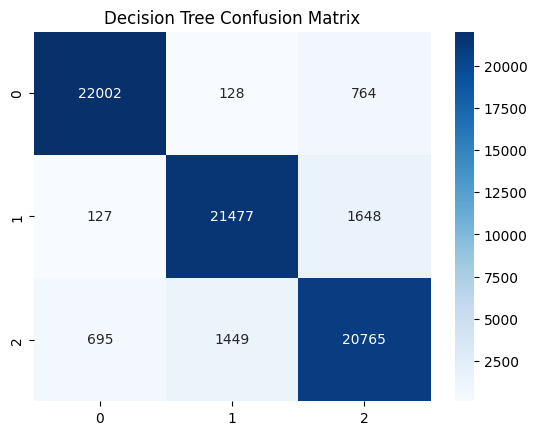

In [11]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.show()


Random Forest Accuracy: 0.9498370863804214
              precision    recall  f1-score   support

  High Yield       0.97      0.96      0.97     22894
   Low Yield       0.96      0.95      0.95     23252
Medium Yield       0.92      0.94      0.93     22909

    accuracy                           0.95     69055
   macro avg       0.95      0.95      0.95     69055
weighted avg       0.95      0.95      0.95     69055



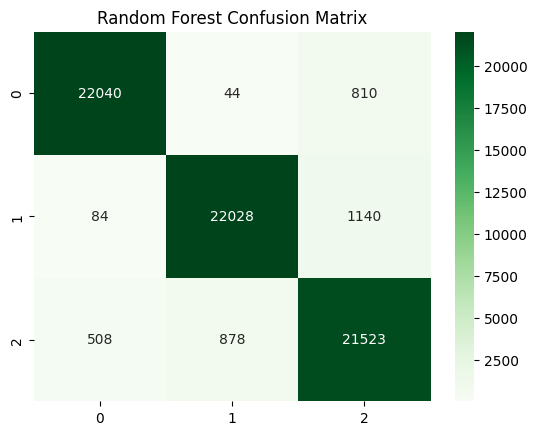

In [12]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.show()


Logistic Regression Accuracy: 0.5080298312938961
              precision    recall  f1-score   support

  High Yield       0.54      0.55      0.54     22894
   Low Yield       0.53      0.58      0.55     23252
Medium Yield       0.45      0.39      0.42     22909

    accuracy                           0.51     69055
   macro avg       0.50      0.51      0.51     69055
weighted avg       0.50      0.51      0.51     69055



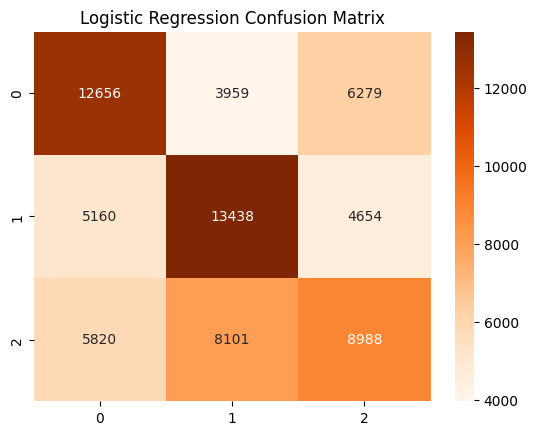

In [13]:
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Oranges')
plt.title("Logistic Regression Confusion Matrix")
plt.show()


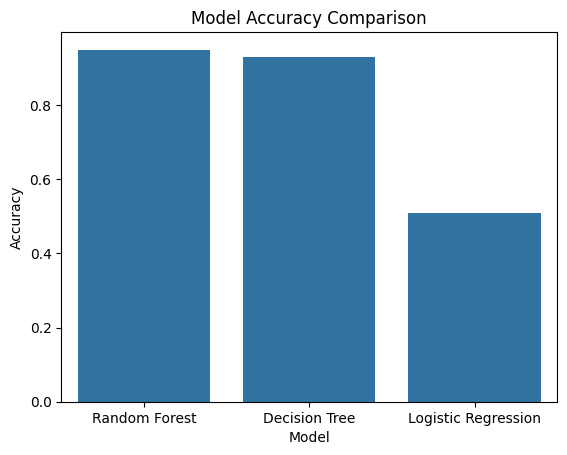

,Model,Accuracy
1,Random Forest,0.949837
0,Decision Tree,0.930331
2,Logistic Regression,0.508030


In [14]:
results = {
    'Decision Tree': accuracy_score(y_test, y_pred_dt),
    'Random Forest': accuracy_score(y_test, y_pred_rf),
    'Logistic Regression': accuracy_score(y_test, y_pred_log)
}

results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy']).sort_values(by='Accuracy', ascending=False)
sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.title("Model Accuracy Comparison")
plt.show()

results_df
